In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the random seed and the plotting style
np.random.seed(124)
plt.style.use('ggplot')

In [2]:
# Define the sample size
N0 = int(1e6)

# Calculate the population density
x_true = np.arange(-4, 4, .01)
y_true = np.exp(-x_true ** 2 / 2) / np.sqrt(2 * np.pi)

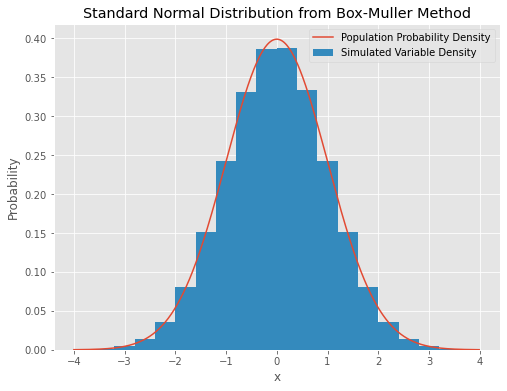

In [3]:
def BoxMuller(size, container):
    for i in range(size // 2):
        u1, u2 = np.random.uniform(size=2)
        param = np.sqrt(-2 * np.log(u1))
        x = param * np.cos(2 * np.pi * u2)
        y = param * np.sin(2 * np.pi * u2)
        # Store the generated r.v. into the container
        container.extend([x, y])
        
# Initialize the container
bm_norm = []
BoxMuller(N0, bm_norm)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_true, y_true, label='Population Probability Density')
plt.hist(bm_norm, bins=20, density=True, range=(-4, 4), 
         label='Simulated Variable Density')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.title('Standard Normal Distribution from Box-Muller Method')
# plt.savefig('box_muller.png')
plt.show()

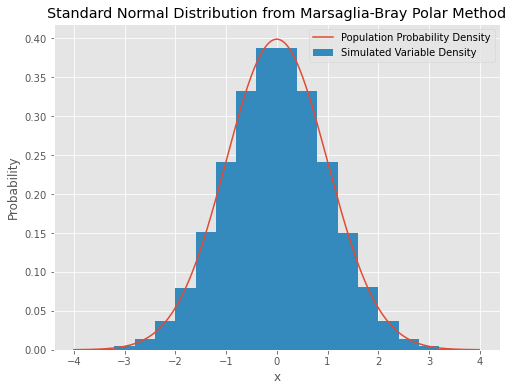

In [4]:
def Marsaglia(size, container):
    count = 0
    while count < size:
        v1, v2 = np.random.uniform(-1, 1, 2)
        s = v1 ** 2 + v2 ** 2
        if s <= 1:
            param = np.sqrt(-2 * np.log(s) / s)
            x = v1 * param
            y = v2 * param
            container.extend([x, y])
            count += 2

mar_norm = []
Marsaglia(N0, mar_norm)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_true, y_true, label='Population Probability Density')
plt.hist(mar_norm, bins=20, density=True, range=(-4, 4), 
         label='Simulated Variable Density')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.title('Standard Normal Distribution from Marsaglia-Bray Polar Method')
# plt.savefig('marsaglia.png')
plt.show()

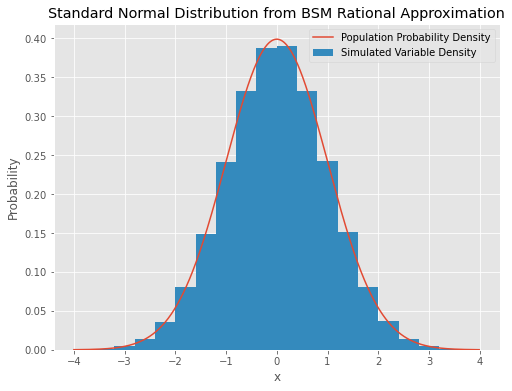

In [5]:
def BSM_Rational(size, container):
    a = [2.50662823884, -18.61500062529, 41.39119773534, -25.44106049637]
    b = [-8.47351093090, 23.08336743743, -21.06224101826, 3.13082909833]
    c = [0.3374754822726147, 0.9761690190917186, 0.1607979714918209,
         0.0276438810333863, 0.0038405729373609, 0.0003951896511919,
         0.0000321767881768, 0.0000002888167364, 0.0000003960315187]
    for i in range(size):
        u = np.random.uniform()
        y = u - 0.5
        if np.abs(y) < 0.42:
            r = y * y
            x = y * (((a[3] * r + a[2]) * r + a[1]) * r + a[0]) / (
                        (((b[3] * r + b[2]) * r + b[1]) * r + b[0]) * r + 1)
        else:
            r = u
            if y > 0:
                r = 1 - u
            r = np.log(-np.log(r))
            x = c[0] + r * (c[1] + r * (c[2] + r * (c[3] + r * (c[4] + r * (
                    c[5] + r * (c[6] + r * (c[7] + r * c[8])))))))
            if y < 0:
                x = -x
        container.append(x)

bsm_norm = []
BSM_Rational(N0, bsm_norm)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_true, y_true, label='Population Probability Density')
plt.hist(bsm_norm, bins=20, density=True, range=(-4, 4), 
         label='Simulated Variable Density')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.title('Standard Normal Distribution from BSM Rational Approximation')
# plt.savefig('bsm_rational.png')
plt.show()

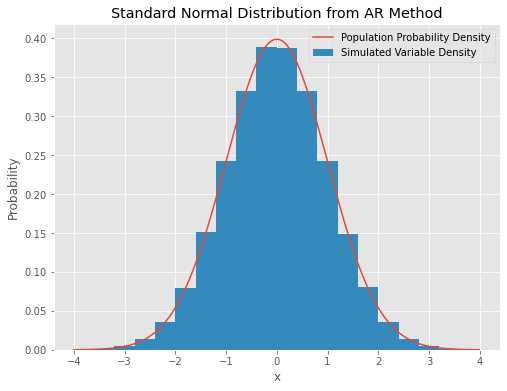

In [6]:
def AR_norm(size, container):
    count = 0
    while count < size:
        u1, u2 = np.random.uniform(size=2)
        y = -np.log(u2)
        if u1 <= np.exp(-(y - 1) ** 2 / 2):
            u3 = np.random.uniform()
            if u3 < 0.5:
                x = -y
            else:
                x = y
            container.append(x)
            count += 1
            
ar_norm = []
AR_norm(N0, ar_norm)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_true, y_true, label='Population Probability Density')
plt.hist(ar_norm, bins=20, density=True, range=(-4, 4), 
         label='Simulated Variable Density')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.title('Standard Normal Distribution from AR Method')
# plt.savefig('ar.png')
plt.show()